[View in Colaboratory](https://colab.research.google.com/github/cassiass/keras-tensorflow/blob/master/Projeto_aula7.ipynb)

Imports

In [11]:
import os
import sys
print(f'Python: {sys.version}')
print(f"LD_LIBRARY_PATH: {os.environ['LD_LIBRARY_PATH']}")
print(f"PATH: {os.environ['PATH']}")
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Python: 3.10.13 (main, Feb 28 2024, 00:00:00) [GCC 13.2.1 20231205 (Red Hat 13.2.1-6)]
LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64:/usr/local/cuda-12.4/lib64:
PATH: /home/marcelo/des/estudo_data_science/.env/bin:/home/marcelo/anaconda3/bin:/home/marcelo/anaconda3/condabin:/home/marcelo/.local/bin:/home/marcelo/bin:/usr/local/bin:/usr/local/sbin:/usr/bin:/usr/sbin:/usr/local/cuda-12.4:/usr/local/cuda-12.4/bin:/usr/local/cuda-12.4/lib64:/usr/local/cuda-12.4:/usr/local/cuda-12.4/bin:/usr/local/cuda-12.4/lib64


In [14]:
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

f'python: {sys.version}'
f'tensorflow: {tf.__version__}'

tf.config.list_physical_devices('GPU')

'python: 3.10.13 (main, Feb 28 2024, 00:00:00) [GCC 13.2.1 20231205 (Red Hat 13.2.1-6)]'

'tensorflow: 2.15.0'

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Carregando o dataset

In [15]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [16]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

60000

(60000, 28, 28)

(10000, 28, 28)

10000

0

9

Exibição dos dados

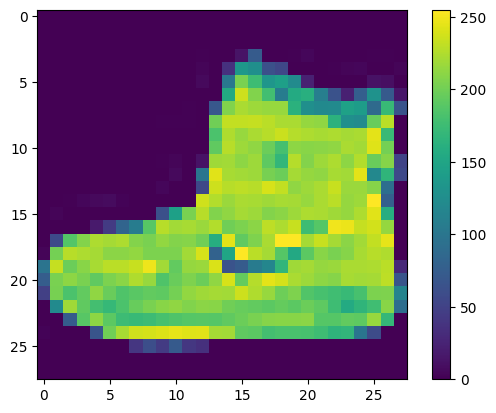

In [17]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [18]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [20]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

2024-03-23 15:28:44.613097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 15:28:44.613239: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 15:28:44.613290: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/5


2024-03-23 15:28:45.647483: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f64d0a58730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-23 15:28:45.647500: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-03-23 15:28:45.650412: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-23 15:28:45.662842: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1711218525.707179   15599 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 2s 994us/step - loss: 0.5246 - accuracy: 0.8121 - val_loss: 0.4170 - val_accuracy: 0.8478
Epoch 2/5
1500/1500 [==============================] - 1s 911us/step - loss: 0.3992 - accuracy: 0.8552 - val_loss: 0.3681 - val_accuracy: 0.8633
Epoch 3/5
1500/1500 [==============================] - 1s 902us/step - loss: 0.3644 - accuracy: 0.8659 - val_loss: 0.3520 - val_accuracy: 0.8752
Epoch 4/5
1500/1500 [==============================] - 1s 898us/step - loss: 0.3390 - accuracy: 0.8765 - val_loss: 0.3441 - val_accuracy: 0.8736
Epoch 5/5
1500/1500 [==============================] - 1s 911us/step - loss: 0.3213 - accuracy: 0.8815 - val_loss: 0.3285 - val_accuracy: 0.8800


Salvando e carregando o modelo treinado

In [21]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/home/marcelo/des/estudo_data_science/.env/lib64/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizando as acurácias de treino e validação por época

In [24]:
historico.history

{'loss': [0.524631679058075,
  0.39916759729385376,
  0.36438822746276855,
  0.33897000551223755,
  0.321333110332489],
 'accuracy': [0.8120833039283752,
  0.8552291393280029,
  0.8659166693687439,
  0.8765000104904175,
  0.8815000057220459],
 'val_loss': [0.41698315739631653,
  0.36809301376342773,
  0.35200029611587524,
  0.3440921902656555,
  0.32849347591400146],
 'val_accuracy': [0.8477500081062317,
  0.8632500171661377,
  0.875249981880188,
  0.8735833168029785,
  0.8799999952316284]}

Text(0.5, 1.0, 'Acurácia por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'acurácia')

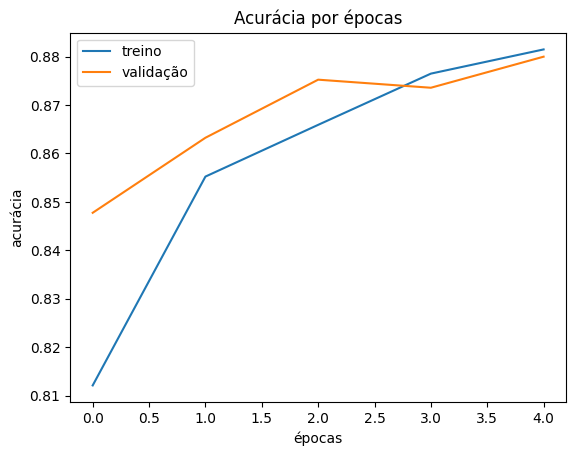

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

Text(0.5, 1.0, 'Perda por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'perda')

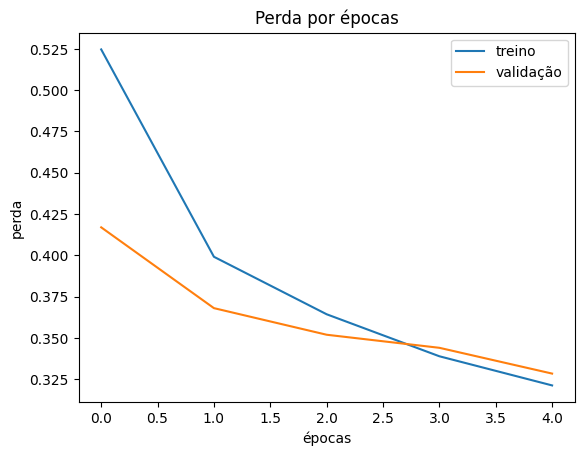

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [28]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 0s 452us/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 0s 428us/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [29]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 613us/step - loss: 51.5160 - accuracy: 0.8617
Perda do teste: 51.5160026550293
Acurácia do teste: 0.8616999983787537
